<a href="https://colab.research.google.com/github/msc25/inse6220/blob/main/40156699_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn==0.23.2

In [4]:
!pip install pycaret==2.3.6

In [5]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#use seaborn plotting style defaults
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm



#from google.colab import files

**DATASET**

**Price:**price in US dollars (\$326--\$18,823)

**Carat:**weight of the diamond (0.2--5.01)

**Cut:**quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**Color:**diamond colour, from J (worst) to D (best)

**clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x:** length in mm (0--10.74)

**y:** width in mm (0--58.9)

**z:** depth in mm (0--31.8)

**depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table:** width of top of diamond relative to widest point (43--95)

Link to dataset: https://kaggle.com/datasets/shivam2503/diamonds

**Changes made to datset:**


*   It has 11 columns out of which I have only retained columns namely carat (weight of diamond), depth (Z/mean [x,y]), price (US Dollars), x (Length), y (Width), z (Depth) and class (modified colour to class).  
*   Replaced alphabets with numbers for classification purpose.
*   The dataset is huge in number so plenty of rows have been dropped.

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/msc25/inse6220/main/diamonds_final.csv')
df.head()

,carat,depth,price,x,y,z,class
0,0.23,61.5,326,3.95,3.98,2.43,1
1,0.21,59.8,326,3.89,3.84,2.31,1
2,0.23,56.9,327,4.05,4.07,2.31,1
3,0.29,62.4,334,4.20,4.23,2.63,2
4,0.31,63.3,335,4.34,4.35,2.75,3


**CLASSES**

In [10]:
y = df['class']
target = df['class'].to_numpy()

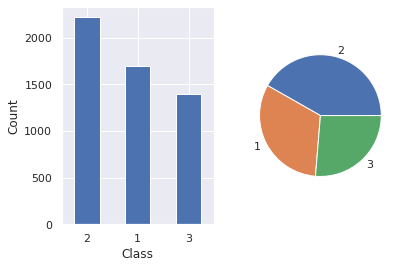

In [11]:
plt.subplot(1,2,1)
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.subplot(1,2,2)
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [13]:
X = df.iloc[:,0:6]
#X = df.drop(columns=['class'])
X.head(10)

,carat,depth,price,x,y,z
0,0.23,61.5,326,3.95,3.98,2.43
1,0.21,59.8,326,3.89,3.84,2.31
2,0.23,56.9,327,4.05,4.07,2.31
3,0.29,62.4,334,4.20,4.23,2.63
4,0.31,63.3,335,4.34,4.35,2.75
5,0.24,62.8,336,3.94,3.96,2.48
6,0.24,62.3,336,3.95,3.98,2.47
7,0.26,61.9,337,4.07,4.11,2.53
8,0.22,65.1,337,3.87,3.78,2.49
9,0.23,59.4,338,4.00,4.05,2.39


In [15]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,5310.0,0.897429,0.235333,0.20,0.90,0.95,1.02,1.58
depth,5310.0,61.878437,1.669358,43.00,61.00,62.00,62.80,71.80
price,5310.0,3701.800188,1112.655086,326.00,3655.25,3967.00,4363.00,4637.00
x,5310.0,6.104405,0.665661,3.79,6.04,6.27,6.48,7.55
y,5310.0,6.104277,0.655677,3.75,6.05,6.27,6.47,7.51
z,5310.0,3.775855,0.420260,0.00,3.73,3.88,4.01,4.87


In [17]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,5310.0,-3.973309e-15,1.000094,-2.963860,0.010924,0.223409,0.520887,2.900715
depth,5310.0,-5.256151e-15,1.000094,-11.309868,-0.526262,0.072827,0.552099,5.943902
price,5310.0,-5.834212e-16,1.000094,-3.034290,-0.041841,0.238371,0.594310,0.840591
x,5310.0,-2.086477e-16,1.000094,-3.477181,-0.096762,0.248791,0.564297,2.171874
y,5310.0,1.538426e-15,1.000094,-3.590945,-0.082788,0.252775,0.557832,2.144130
z,5310.0,-4.309236e-16,1.000094,-8.985426,-0.109121,0.247835,0.557196,2.603744


In [19]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**DATA VISUALISATION**

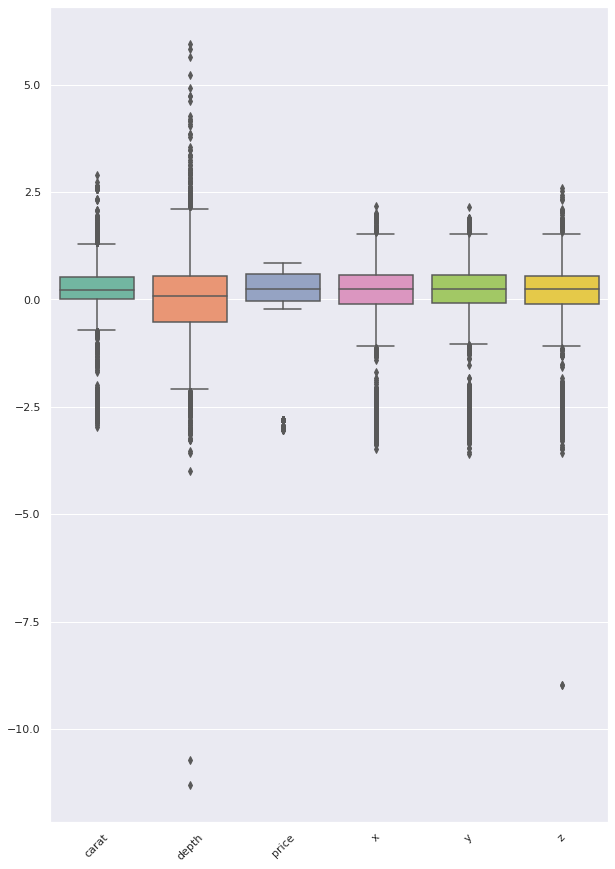

In [20]:
ax = plt.figure(figsize=(10,15))
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

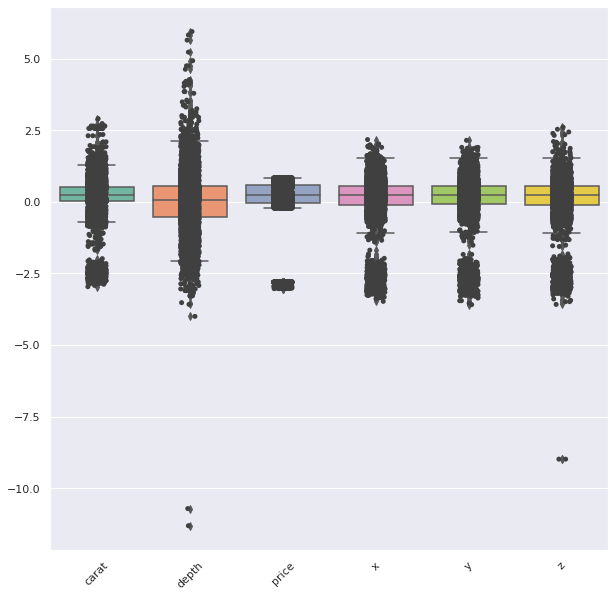

In [21]:
ax = plt.figure(figsize=(10, 10))    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [22]:
df.describe()

,carat,depth,price,x,y,z
count,5.310000e+03,5.310000e+03,5.310000e+03,5.310000e+03,5.310000e+03,5.310000e+03
mean,-3.973309e-15,-5.256151e-15,-5.834212e-16,-2.086477e-16,1.538426e-15,-4.309236e-16
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00
min,-2.963860e+00,-1.130987e+01,-3.034290e+00,-3.477181e+00,-3.590945e+00,-8.985426e+00
25%,1.092435e-02,-5.262621e-01,-4.184097e-02,-9.676246e-02,-8.278769e-02,-1.091214e-01
50%,2.234090e-01,7.282714e-02,2.383711e-01,2.487915e-01,2.527752e-01,2.478345e-01
75%,5.208874e-01,5.520985e-01,5.943100e-01,5.642973e-01,5.578324e-01,5.571963e-01
max,2.900715e+00,5.943902e+00,8.405910e-01,2.171874e+00,2.144130e+00,2.603744e+00


<Figure size 432x288 with 0 Axes>

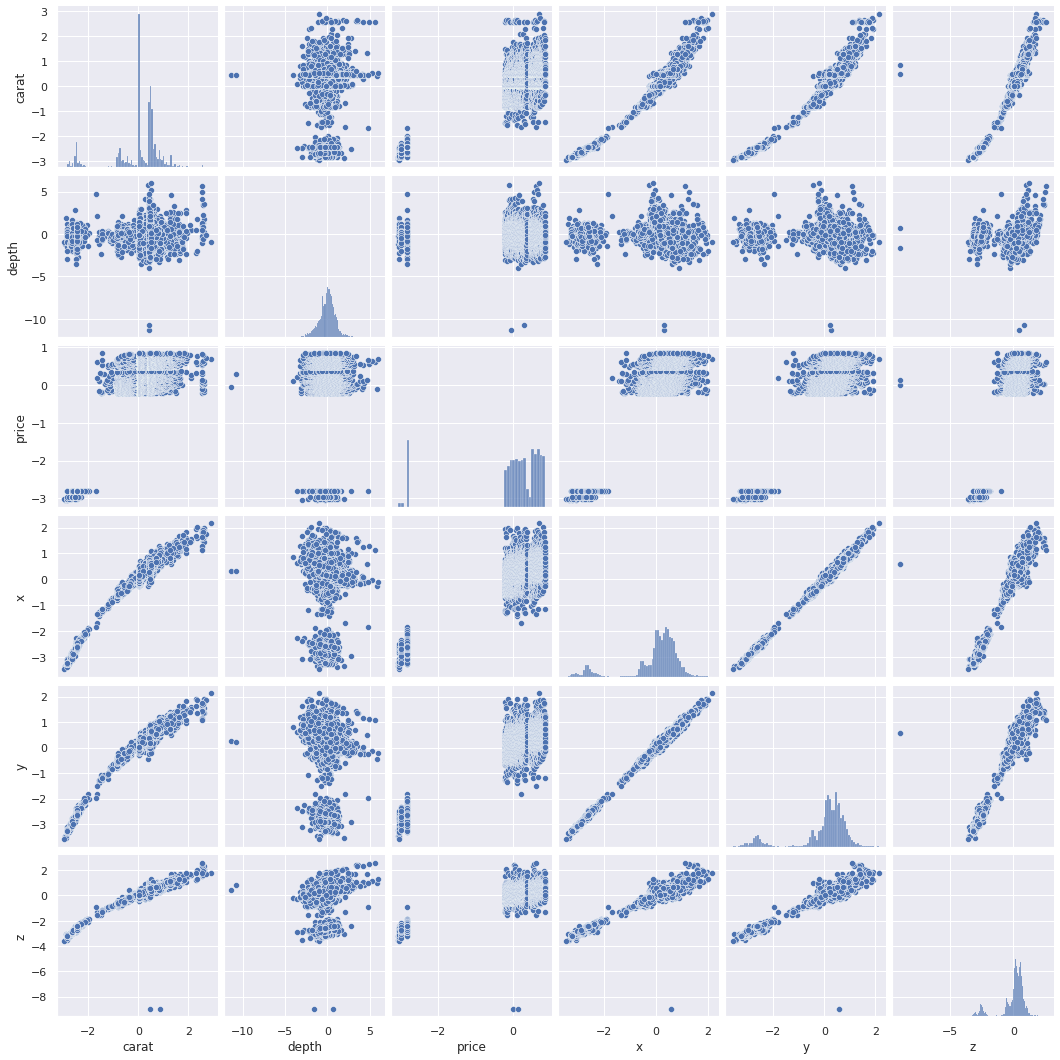

In [23]:
#sns.pairplot(df, hue='class')
ax = plt.figure()
ax = sns.pairplot(df)

**COVARIANCE**

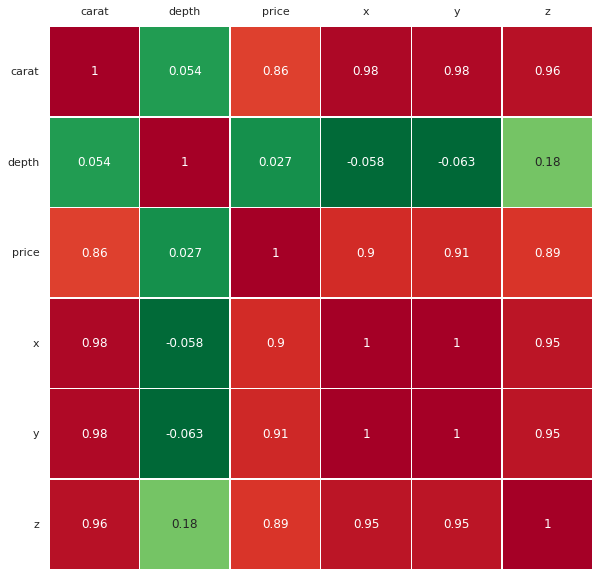

In [24]:
dfc = df - df.mean() #centered data
ax = plt.figure(figsize=(16, 10)) 
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True, )
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

**PRINCIPAL COMPONENT** **ANALYSIS** **(PCA)**

Text(0, 0.5, '$Z_2$')

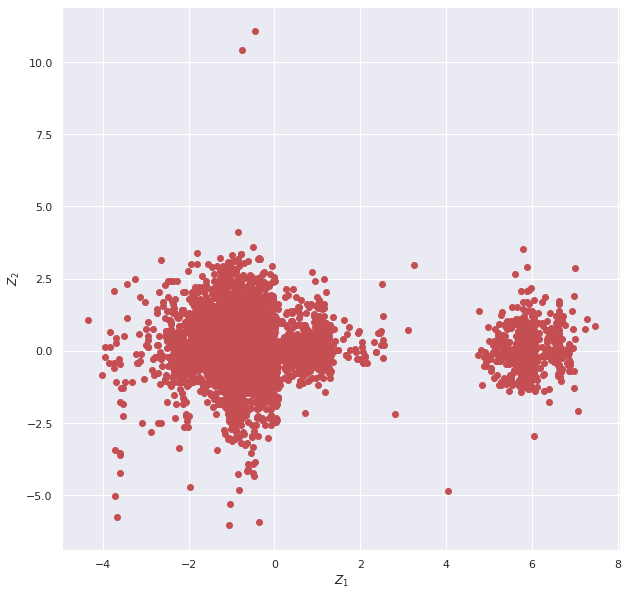

In [25]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure(figsize=(10, 10))
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**EIGENVECTORS**

[[-0.4505605  -0.01886092  0.39063987  0.39945058  0.68854032 -0.10193849]
 [-0.01599208 -0.98008485 -0.01013326  0.15613136 -0.12098439  0.0078123 ]
 [-0.42828498  0.00677056 -0.88264188  0.07794804  0.17691371  0.00975192]
 [-0.45441907  0.09241472  0.16789052  0.20048373 -0.39558799  0.74839296]
 [-0.45456911  0.09719618  0.11739518  0.17161323 -0.55796818 -0.65525461]
 [-0.4474167  -0.14506733  0.16208724 -0.860431    0.11026424 -0.00133567]]


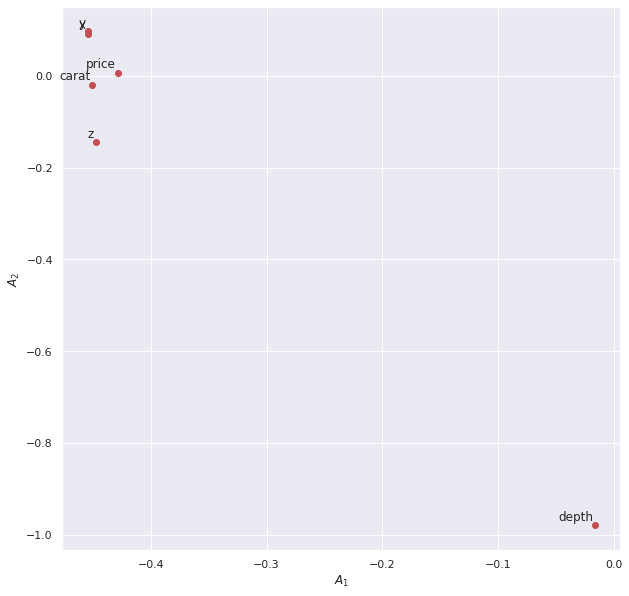

In [26]:
A = pca.components_.T 
print(A)

plt.figure(figsize=(10, 10))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

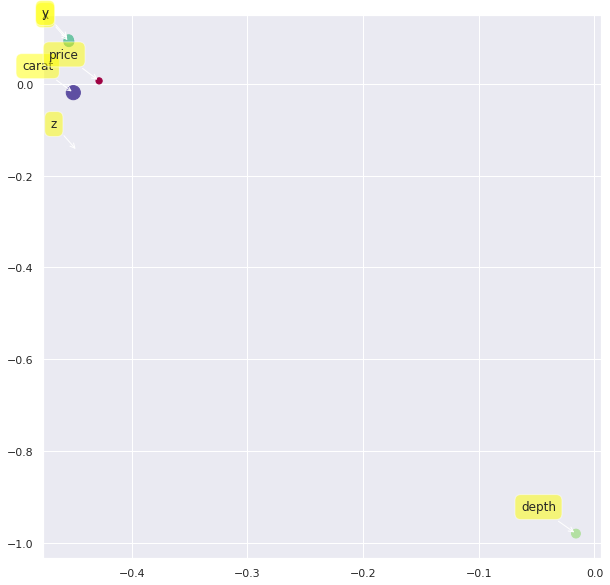

In [27]:
plt.figure(figsize=(10, 10))
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**SCREE PLOT OR ELBOW CURVE**

Text(0, 0.5, 'Explained variance')

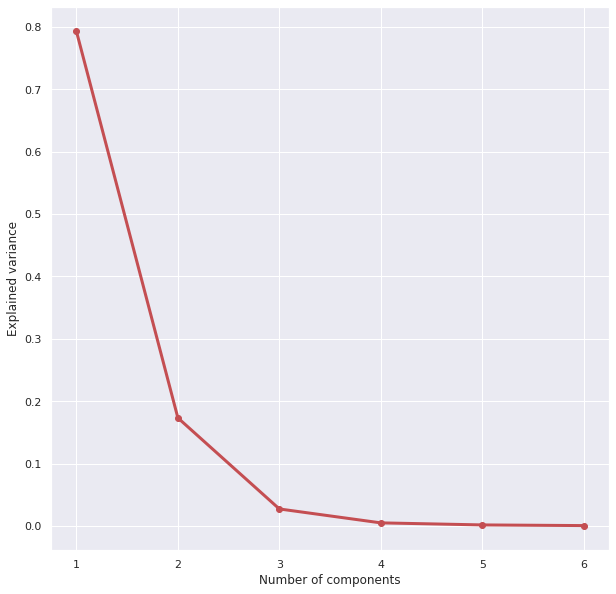

In [28]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.figure(figsize=(10, 10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**EXPLAINED VARIANCE**

96.57579730313013


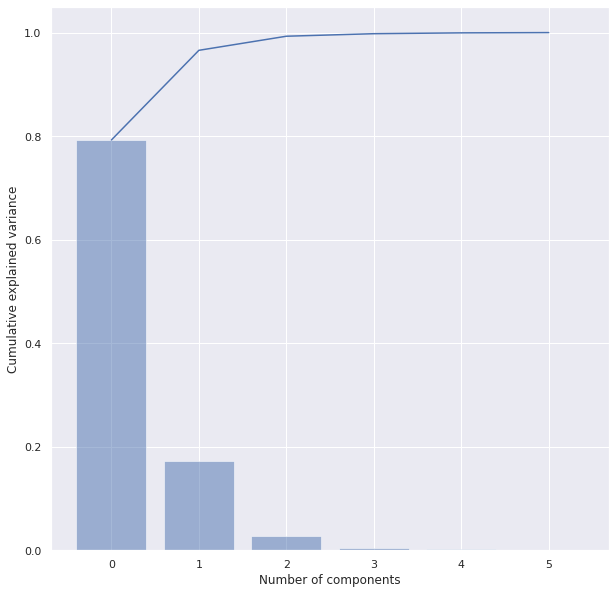

In [29]:
plt.figure(figsize=(10, 10))
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
print((ell[0]+ell[1])*100)

**BIPLOT**

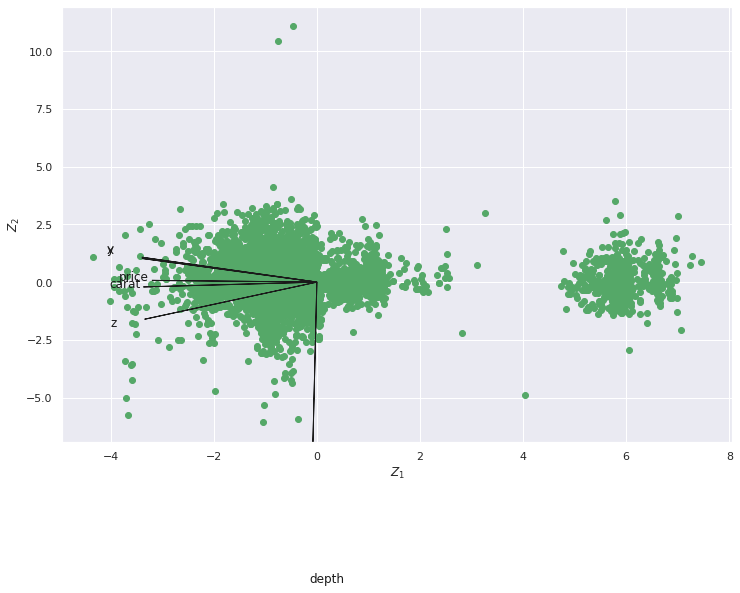

In [30]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure(figsize=(12, 8))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')



**PRINCIPAL COMPONENTS**

(6.5, -0.5)

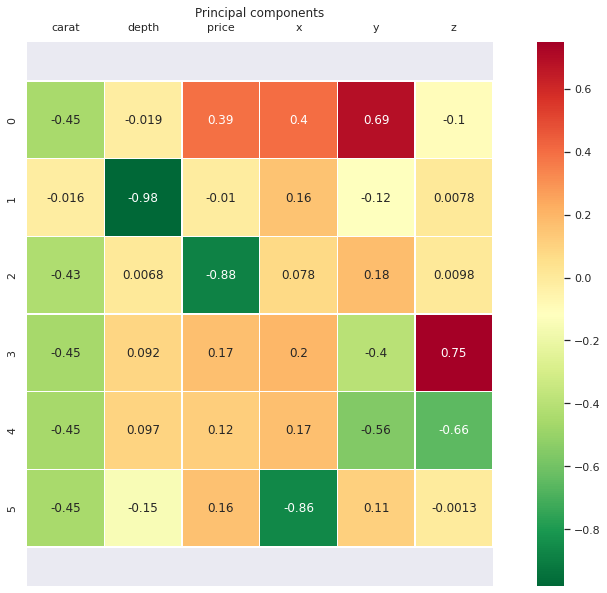

In [32]:
comps = pd.DataFrame(A,columns = variables)

plt.figure(figsize=(16,10))
ax = sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


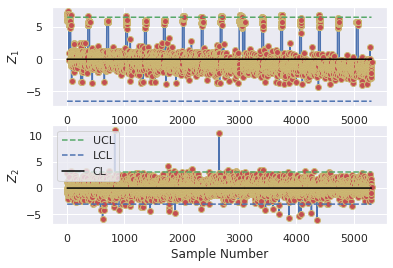

In [33]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()


**CLASSIFICATION**

In [34]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [40]:
df_ml = pd.read_csv('https://raw.githubusercontent.com/msc25/inse6220/main/diamonds_final.csv')

In [41]:
data = df_ml.sample(frac=0.9, random_state=786)
data_unseen = df_ml.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4779, 7)
Unseen Data For Predictions: (531, 7)


In [42]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(4779, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4625,0.6221,0.4369,0.4558,0.4542,0.1584,0.1603,0.248
et,Extra Trees Classifier,0.4601,0.6296,0.4376,0.4545,0.4542,0.1597,0.1609,0.671
rf,Random Forest Classifier,0.4589,0.6225,0.4340,0.4517,0.4510,0.1550,0.1568,0.807
gbc,Gradient Boosting Classifier,0.4535,0.6163,0.4060,0.4493,0.4204,0.1156,0.1255,1.023
knn,K Neighbors Classifier,0.4451,0.5962,0.4224,0.4478,0.4377,0.1365,0.1387,0.134
ada,Ada Boost Classifier,0.4305,0.5814,0.3700,0.4054,0.3703,0.0613,0.0713,0.174
dt,Decision Tree Classifier,0.4269,0.5605,0.4118,0.4262,0.4258,0.1200,0.1203,0.028
lr,Logistic Regression,0.4254,0.5184,0.3356,0.2306,0.2666,0.0040,0.0091,0.580
dummy,Dummy Classifier,0.4254,0.5000,0.3333,0.1810,0.2539,0.0000,0.0000,0.015
qda,Quadratic Discriminant Analysis,0.4236,0.5435,0.3426,0.4217,0.2990,0.0150,0.0282,0.018


In [44]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [45]:
dt = create_model('dt')
dt
tuned_dt = tune_model(dt)
tuned_dt

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4627,0.5804,0.4081,0.4475,0.4151,0.1243,0.1418
1,0.4388,0.6182,0.3800,0.4225,0.3847,0.0769,0.0905
2,0.4119,0.5545,0.3521,0.3912,0.3504,0.0320,0.0374
3,0.4507,0.5834,0.3959,0.4182,0.4032,0.1090,0.1194
4,0.4090,0.5706,0.3596,0.3838,0.3623,0.0388,0.0442
5,0.4222,0.5669,0.3686,0.3973,0.3806,0.0575,0.0634
6,0.4311,0.5617,0.3788,0.4156,0.3918,0.0731,0.0802
7,0.4491,0.6116,0.3749,0.4211,0.3674,0.0757,0.0989
8,0.4341,0.5860,0.4040,0.4265,0.4210,0.1051,0.1077
9,0.4281,0.5915,0.3673,0.4088,0.3650,0.0555,0.0658


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [47]:
!pip install statsmodels --upgrade

In [48]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [49]:
knn = create_model('knn')
knn
tuned_knn = tune_model(knn)
tuned_knn
evaluate_model(tuned_knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4806,0.6419,0.4511,0.4722,0.4692,0.1853,0.1881
1,0.5015,0.6898,0.4832,0.4977,0.4988,0.2303,0.2307
2,0.5015,0.6547,0.4806,0.4954,0.4966,0.2265,0.2275
3,0.4567,0.6005,0.4475,0.4554,0.4559,0.1657,0.1657
4,0.4597,0.6341,0.4433,0.4567,0.4562,0.1606,0.1614
5,0.4760,0.6380,0.4542,0.4720,0.4727,0.1874,0.1880
6,0.4880,0.6639,0.4617,0.4839,0.4804,0.1960,0.1983
7,0.4162,0.5916,0.3896,0.4053,0.4083,0.0899,0.0905
8,0.4281,0.6111,0.4110,0.4236,0.4249,0.1188,0.1191
9,0.4850,0.6491,0.4709,0.4848,0.4830,0.2012,0.2019


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [50]:
lightgbm = create_model('lightgbm')
lightgbm
tuned_lightgbm = tune_model(lightgbm)
lightgbm
evaluate_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4537,0.5957,0.4293,0.4489,0.4450,0.1420,0.1443
1,0.5134,0.6479,0.4843,0.5040,0.5043,0.2398,0.2421
2,0.4060,0.5724,0.3838,0.3990,0.3991,0.0721,0.0728
3,0.4478,0.5905,0.4322,0.4449,0.4443,0.1420,0.1427
4,0.4925,0.6302,0.4798,0.4917,0.4912,0.2171,0.2174
5,0.5389,0.6755,0.5168,0.5339,0.5349,0.2839,0.2848
6,0.4551,0.6106,0.4244,0.4440,0.4445,0.1433,0.1453
7,0.4491,0.6129,0.4151,0.4358,0.4379,0.1351,0.1368
8,0.4431,0.6163,0.4135,0.4307,0.4318,0.1277,0.1293
9,0.4611,0.6493,0.4446,0.4592,0.4598,0.1704,0.1705


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**CLASSIFICATION + PCA**

In [51]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(4779, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.4383,0.5815,0.3780,0.4182,0.3809,0.0777,0.0897,0.928
ada,Ada Boost Classifier,0.4350,0.5689,0.3645,0.4233,0.3526,0.0536,0.0731,0.166
lr,Logistic Regression,0.4254,0.5195,0.3333,0.1810,0.2539,0.0000,0.0000,0.030
nb,Naive Bayes,0.4254,0.5295,0.3333,0.1810,0.2539,0.0000,0.0000,0.019
ridge,Ridge Classifier,0.4254,0.0000,0.3333,0.1810,0.2539,0.0000,0.0000,0.017
lda,Linear Discriminant Analysis,0.4254,0.5198,0.3333,0.1810,0.2539,0.0000,0.0000,0.018
dummy,Dummy Classifier,0.4254,0.5000,0.3333,0.1810,0.2539,0.0000,0.0000,0.014
qda,Quadratic Discriminant Analysis,0.4245,0.5365,0.3327,0.1887,0.2541,-0.0013,-0.0081,0.018
rf,Random Forest Classifier,0.4141,0.5700,0.3933,0.4082,0.4093,0.0918,0.0922,0.771
et,Extra Trees Classifier,0.4057,0.5661,0.3860,0.4004,0.4019,0.0803,0.0805,0.613


In [53]:
best_model_pca
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)
tuned_best_model_pca
evaluate_model(tuned_best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4478,0.5710,0.3764,0.4174,0.3654,0.0793,0.1017
1,0.4507,0.6329,0.3820,0.4225,0.3739,0.0862,0.1082
2,0.4149,0.5557,0.3482,0.4311,0.3368,0.0255,0.0323
3,0.4328,0.5382,0.3639,0.4050,0.3538,0.0577,0.0717
4,0.4209,0.5586,0.3562,0.3798,0.3489,0.0414,0.0501
5,0.4341,0.6323,0.3592,0.4236,0.3455,0.0443,0.0615
6,0.4371,0.5550,0.3651,0.4152,0.3578,0.0535,0.0709
7,0.4431,0.5642,0.3685,0.4539,0.3546,0.0619,0.0820
8,0.4251,0.5903,0.3550,0.4131,0.3418,0.0374,0.0493
9,0.4581,0.6135,0.3853,0.4084,0.3740,0.0948,0.1218


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…